In [1]:
# Importa a gdal
from osgeo import gdal
gdal.UseExceptions()
from gdalconst import *

In [2]:
# Abre a imagem NIR do CBERS

# Imagem está na pasta 'images'
NIR_filename = "./images/CBERS_4_MUX_20200513_164_106_L2_BAND8.tif"
print ("Abrindo o arquivo: " + NIR_filename)

# Tenta abrir a imagem
try:
    NIR_dataset = gdal.Open(NIR_filename, GA_ReadOnly)
    print("Arquivo aberto com sucesso!")
except:
    print("Erro na abertura do arquivo!")

Abrindo o arquivo: ./images/CBERS_4_MUX_20200513_164_106_L2_BAND8.tif
Arquivo aberto com sucesso!


In [3]:
# Obtém a banda única do dataset
NIR_band = NIR_dataset.GetRasterBand(1)
# Transforma a banda em array
NIR_array = NIR_band.ReadAsArray()

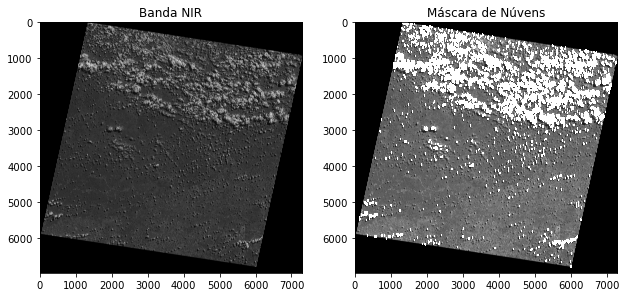

In [5]:
# Importa o matplotlib
import matplotlib.pyplot as plt

# Cria a figura
plt.figure(figsize = (16, 8))

# Mostra a imagem NIR
plt.subplot(131)
plt.title("Banda NIR")
plt.imshow(NIR_array, cmap='gray');

# Cria a máscara de nuvens
import numpy as np
threshold = 130
NIR_cloud_masked = np.ma.masked_where(NIR_array >= threshold, NIR_array)

# Mostra a máscara de nuvens
plt.subplot(132)
plt.title("Máscara de Núvens")
plt.imshow(NIR_cloud_masked, cmap='gray');